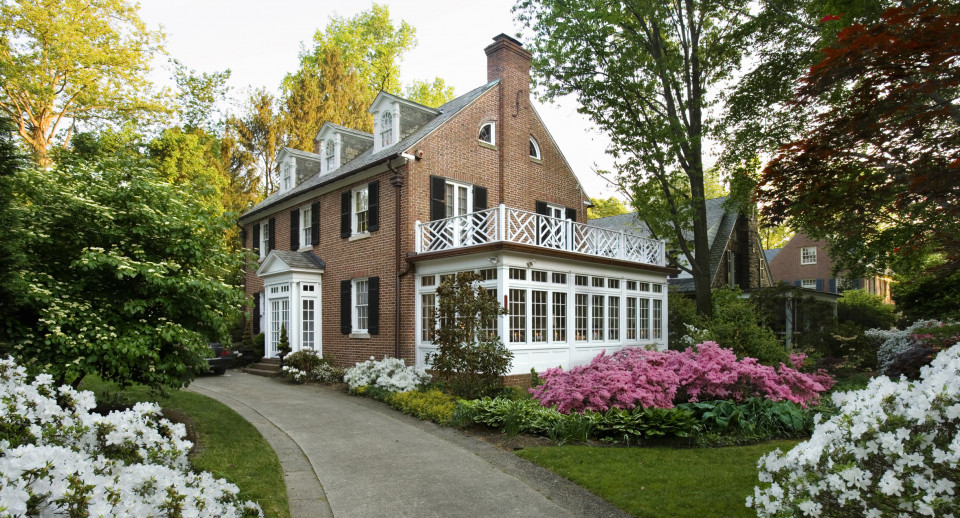

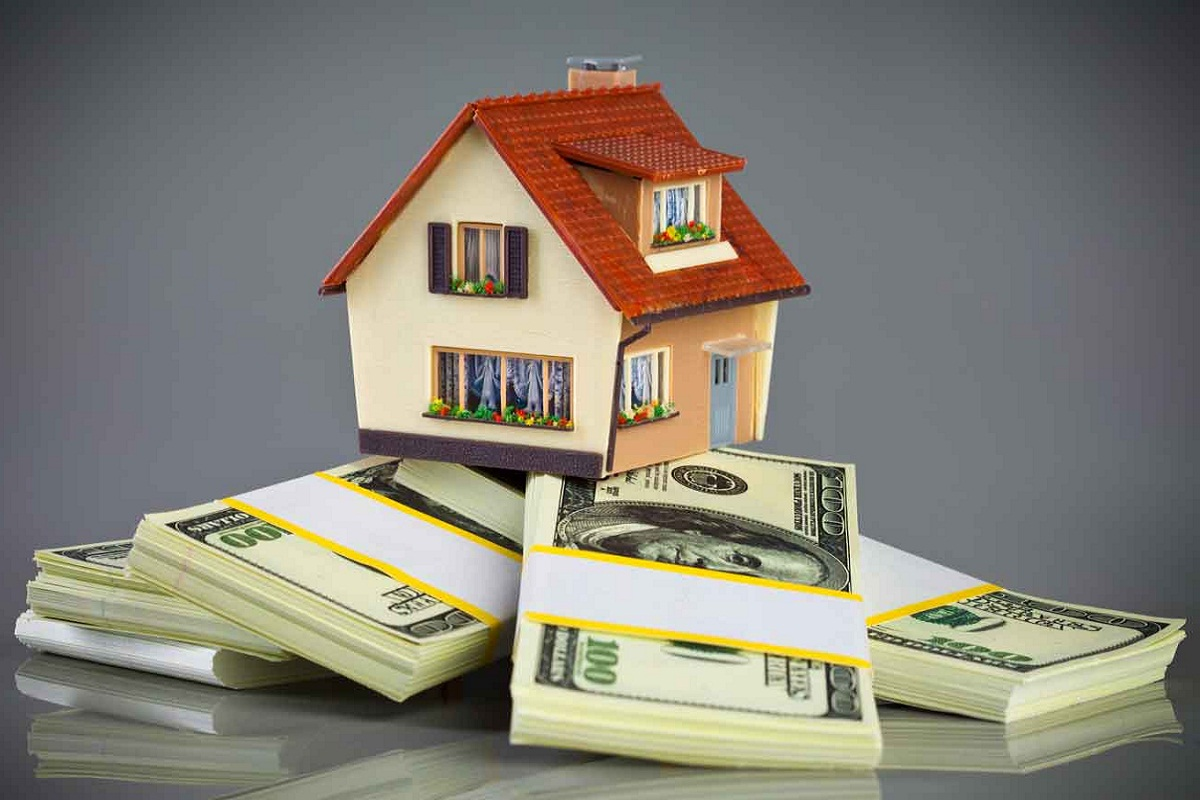

## THE GOAL

* **This notebook shares a study and explaines advanced regression techniques used to predict house prices.**

* **Each feature of the dataset represents a different attribute of each house**
 
* **The goal is to predict the values for SalePrice feature by applying advanced regression models**

## THE METHOD

* **Cross Validation: Using 5-fold cross-validation**

* **4 different advanced regression models were used to predict house prices. Models were XGBoost, LightGBM, Gradient Boosting, Random Forest**

* **Root Mean Squared Error (RMSE) was used as the metric to evaluate the models success**

## IMPORTING PACKAGES AND DATASETS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("husl", 10)
import missingno as msno

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

## EXPLORATORY DATA ANALYSIS

In [6]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


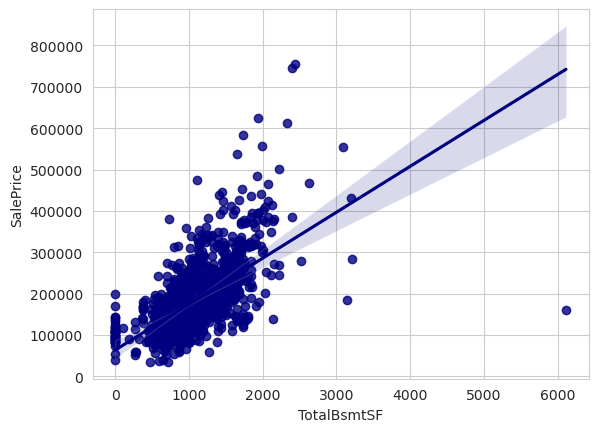

In [16]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', color = 'navy', data = train)
plt.show()

#### **A linear relationship seems to be between TotalBsmtSF and SalePrice features**

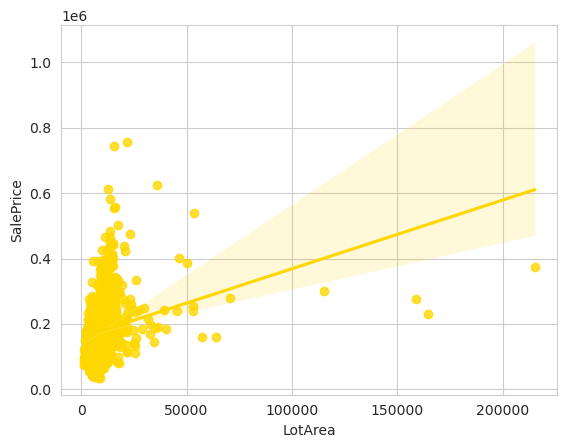

In [14]:
sns.regplot(x = 'LotArea', y = 'SalePrice', color = 'gold', data = train)
plt.show()

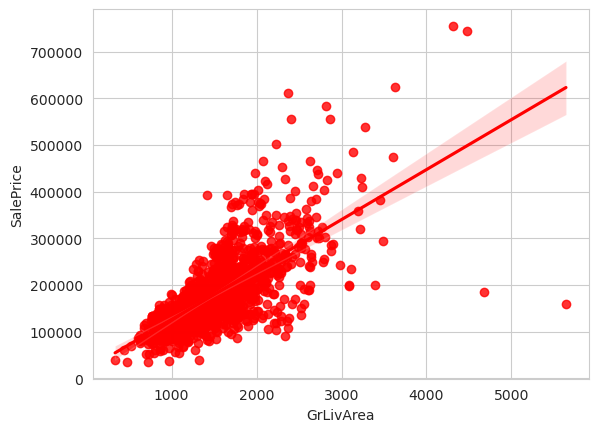

In [15]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'red', data = train)
plt.show()

#### **A linear relationship seems to be between GrLivArea and SalePrice features**

Drop two outliers with large GrLivArea and low SalePrice:

In [21]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Let's plot the Paerson coeficient between columns:

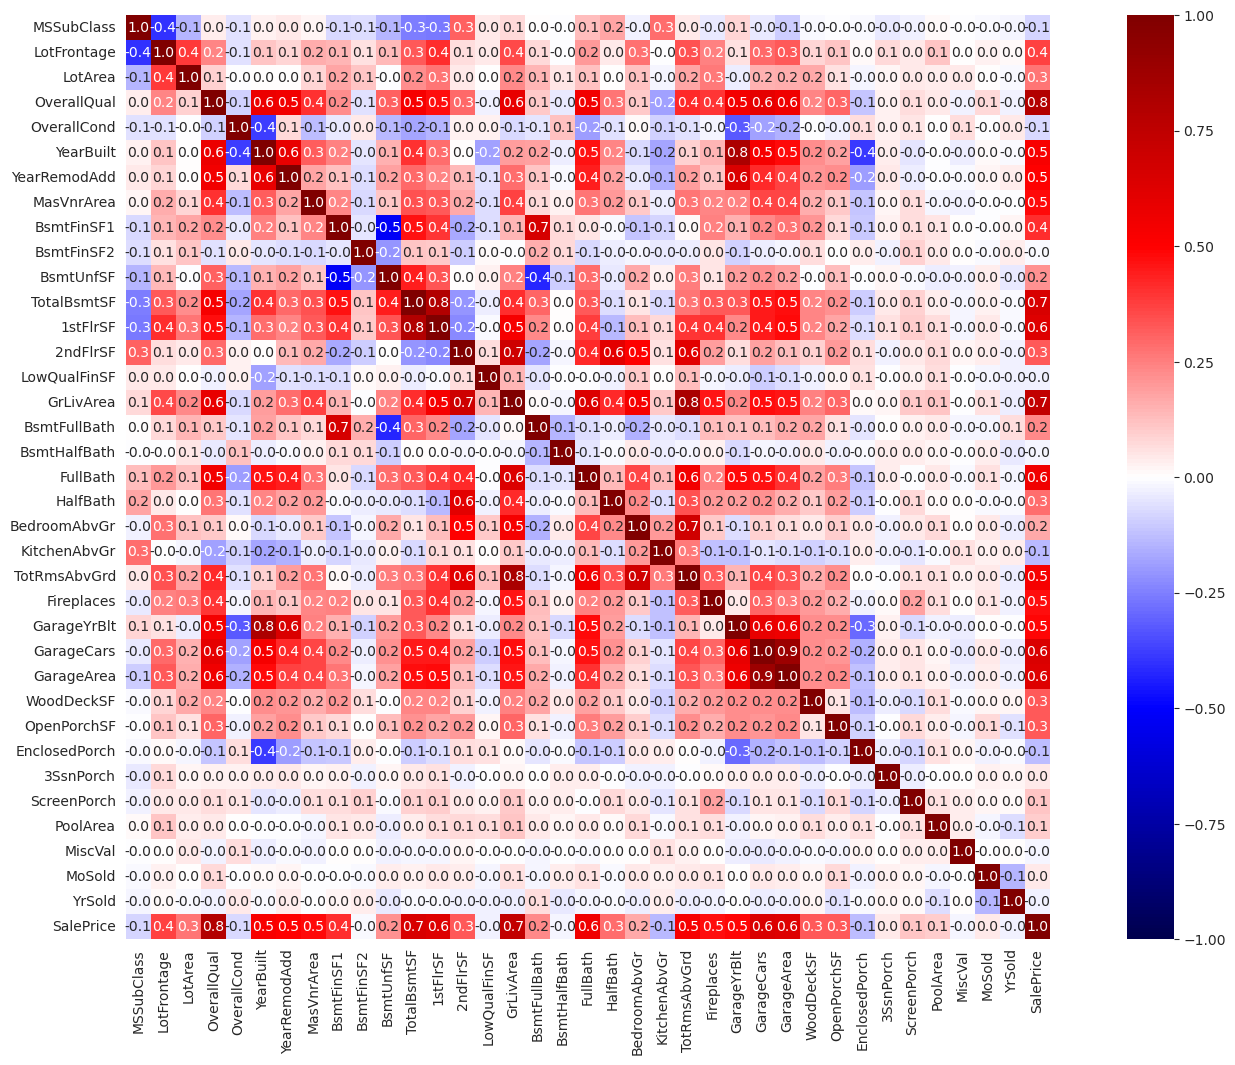

In [32]:
plt.subplots(figsize=(20,12))
a = sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f',square = True)

In [91]:
df = train.corr()
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.405,-0.142,0.033,-0.059,0.028,0.041,0.023,-0.074,-0.066,-0.141,-0.253,-0.263,0.309,0.046,0.077,0.003,-0.002,0.132,0.177,-0.023,0.282,0.040,-0.046,0.085,-0.040,-0.100,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.405,1.000,0.389,0.235,-0.056,0.117,0.081,0.164,0.147,0.055,0.140,0.323,0.407,0.066,0.042,0.355,0.077,-0.005,0.196,0.042,0.274,-0.004,0.336,0.246,0.061,0.293,0.323,0.082,0.117,0.015,0.075,0.046,0.116,0.005,0.026,0.008,0.371
LotArea,-0.142,0.389,1.000,0.091,-0.003,0.007,0.008,0.085,0.175,0.114,-0.003,0.224,0.269,0.041,0.006,0.233,0.147,0.050,0.120,0.007,0.120,-0.017,0.175,0.261,-0.032,0.152,0.164,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.268
OverallQual,0.033,0.235,0.091,1.000,-0.090,0.571,0.550,0.403,0.222,-0.058,0.309,0.539,0.469,0.290,-0.030,0.589,0.104,-0.039,0.548,0.270,0.102,-0.184,0.421,0.392,0.547,0.601,0.557,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.796
OverallCond,-0.059,-0.056,-0.003,-0.090,1.000,-0.376,0.075,-0.127,-0.043,0.040,-0.137,-0.175,-0.145,0.031,0.025,-0.077,-0.054,0.118,-0.193,-0.060,0.013,-0.087,-0.056,-0.022,-0.324,-0.185,-0.151,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.078


In [107]:
d = []
for col in df.columns:
    for row in df.index:
        if row > col:
            d.append((row,col, df[col][row]))
sorted(d, key=lambda x: x[2], reverse=True)[:10]

[('GarageCars', 'GarageArea', 0.8873044983919188),
 ('TotRmsAbvGrd', 'GrLivArea', 0.8294981976715332),
 ('YearBuilt', 'GarageYrBlt', 0.8253168617449711),
 ('TotalBsmtSF', '1stFlrSF', 0.8038296279256135),
 ('SalePrice', 'OverallQual', 0.7957742674249464),
 ('SalePrice', 'GrLivArea', 0.7349681645359332),
 ('GrLivArea', '2ndFlrSF', 0.6946781485093608),
 ('TotRmsAbvGrd', 'BedroomAbvGr', 0.6803896975083625),
 ('BsmtFullBath', 'BsmtFinSF1', 0.6585068504547488),
 ('TotalBsmtSF', 'SalePrice', 0.6511529110475419)]

So we see that we have high correlation between 'GarageCars', 'GarageArea' (of course) and many more.

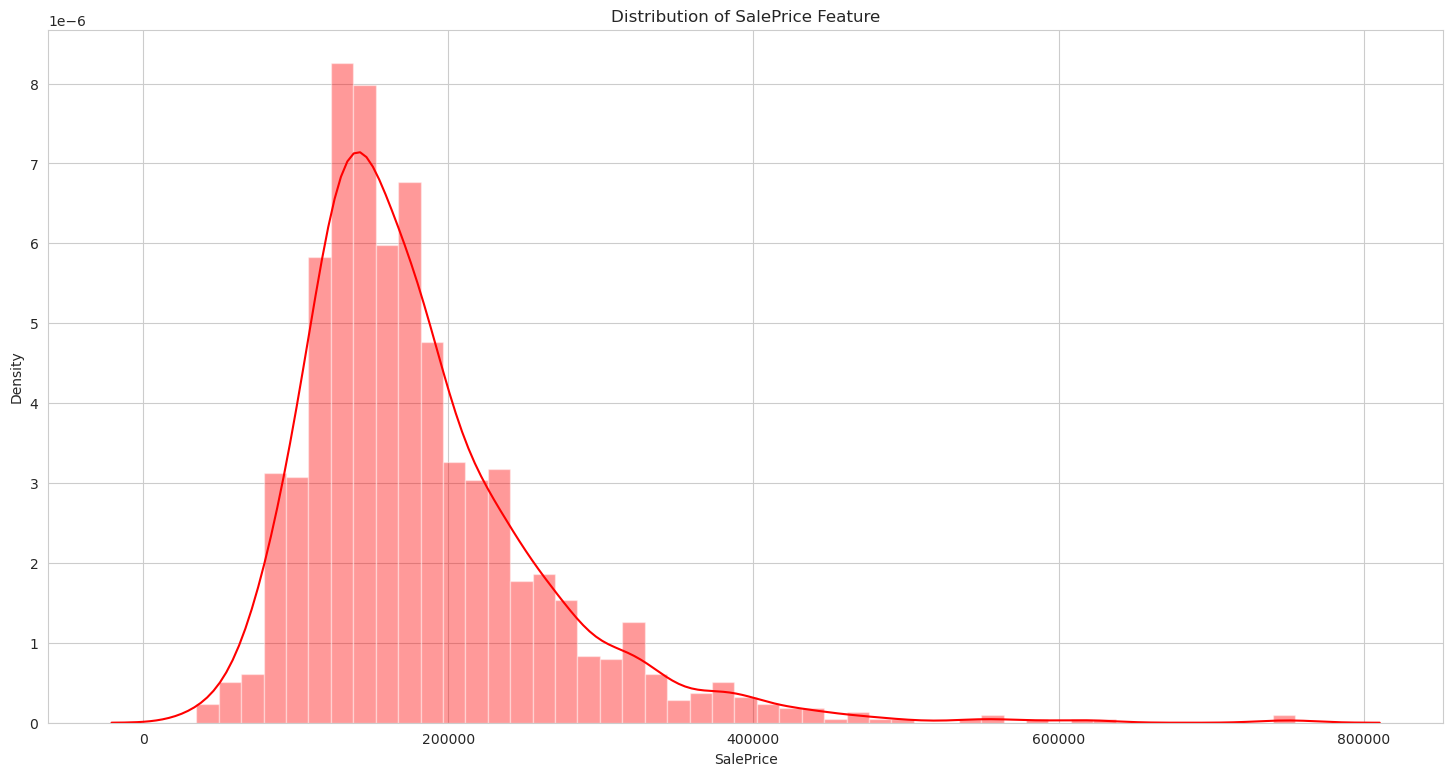

In [114]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="red")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

#### **The distribution of the SalePrice feature seems not like Normal Distribution. To convert the distribution of the SalePrice Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

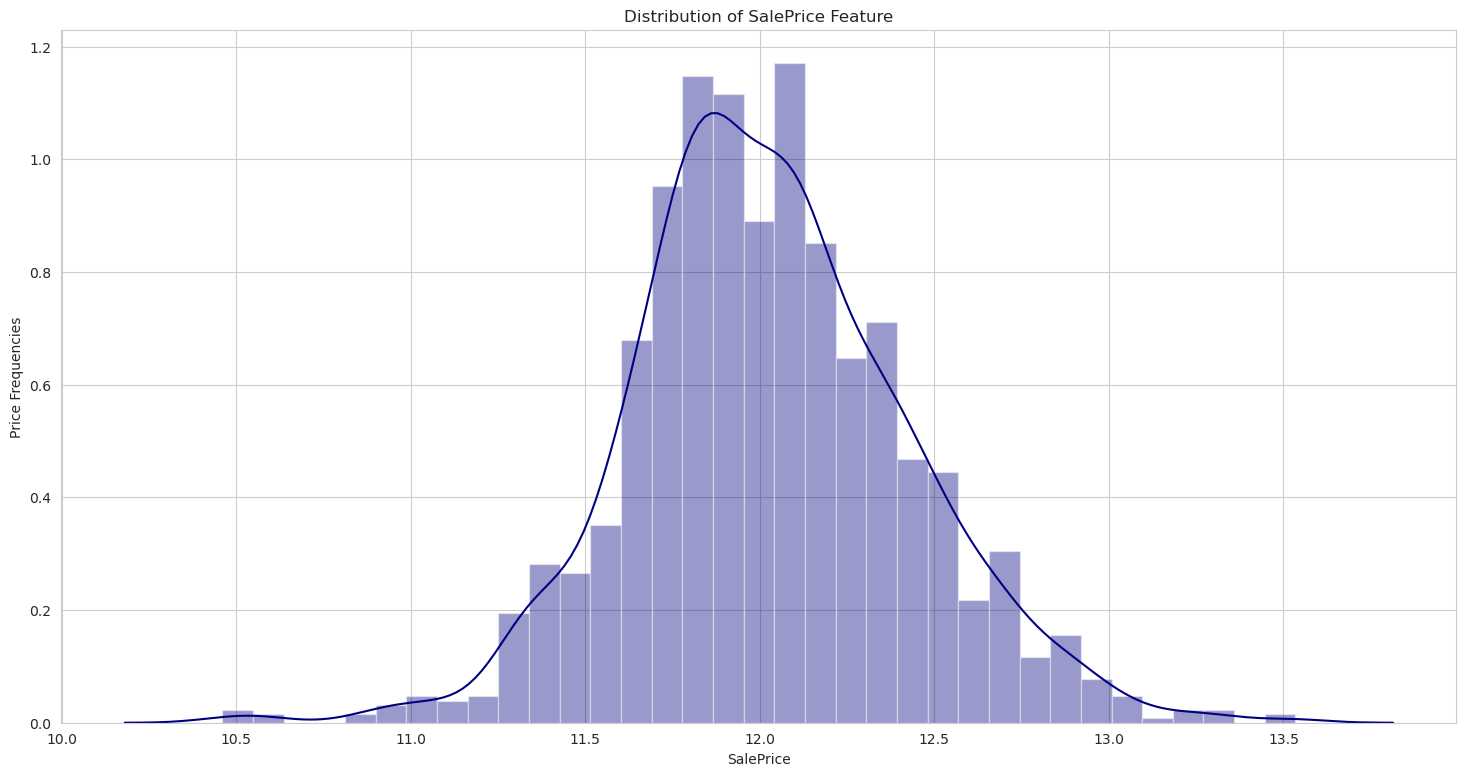

In [116]:
train['SalePrice'] = np.log1p(train['SalePrice'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="navy")
ax.set(ylabel="Price Frequencies")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

#### **Now the distribution of the SalePrice feature is much more fitted for Normal Distribution**

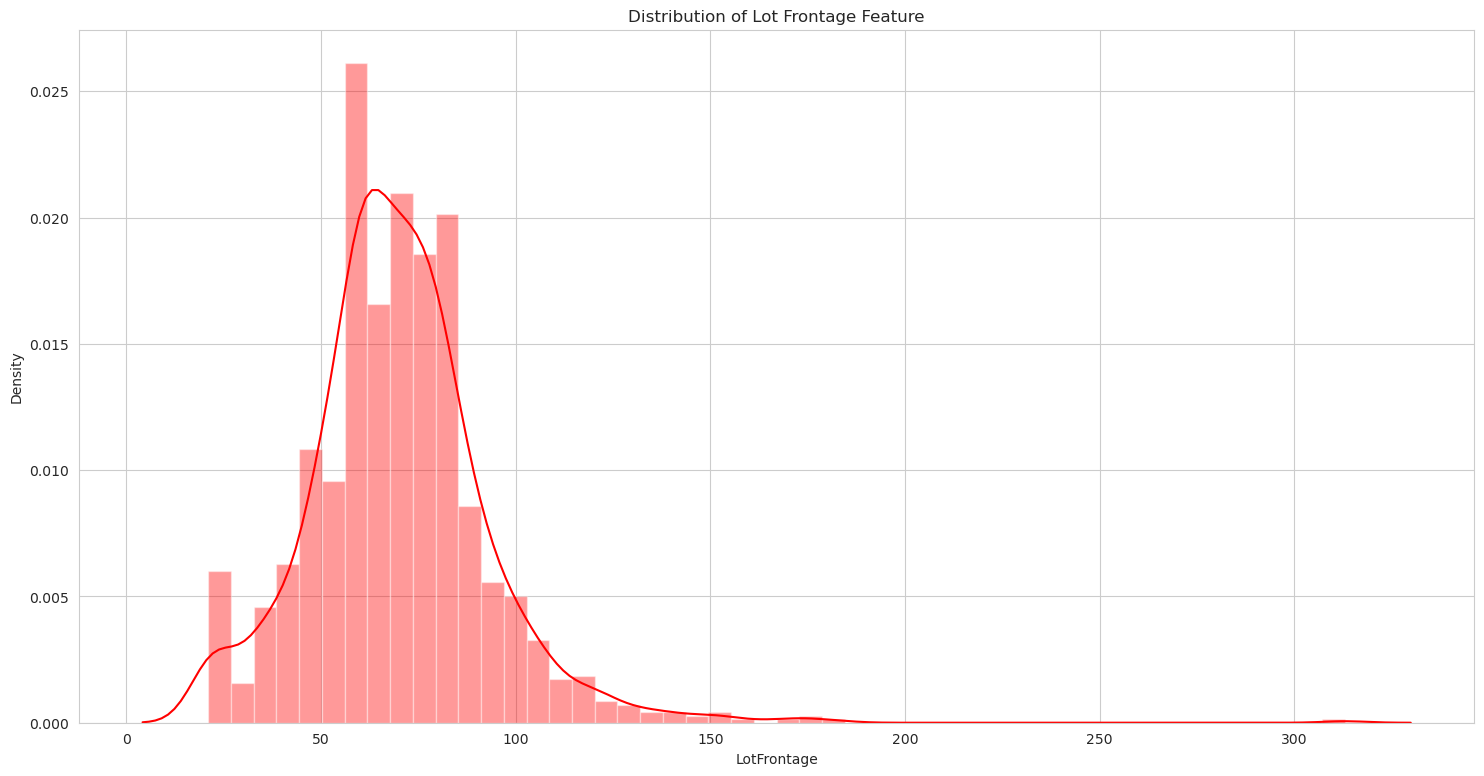

In [117]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['LotFrontage'], color="red")
ax.set(xlabel="LotFrontage")
ax.set(title="Distribution of Lot Frontage Feature")
plt.show()

#### **The distribution of the LotFrontage feature seems not like Normal Distribution. To convert the distribution of the LotFrontage Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

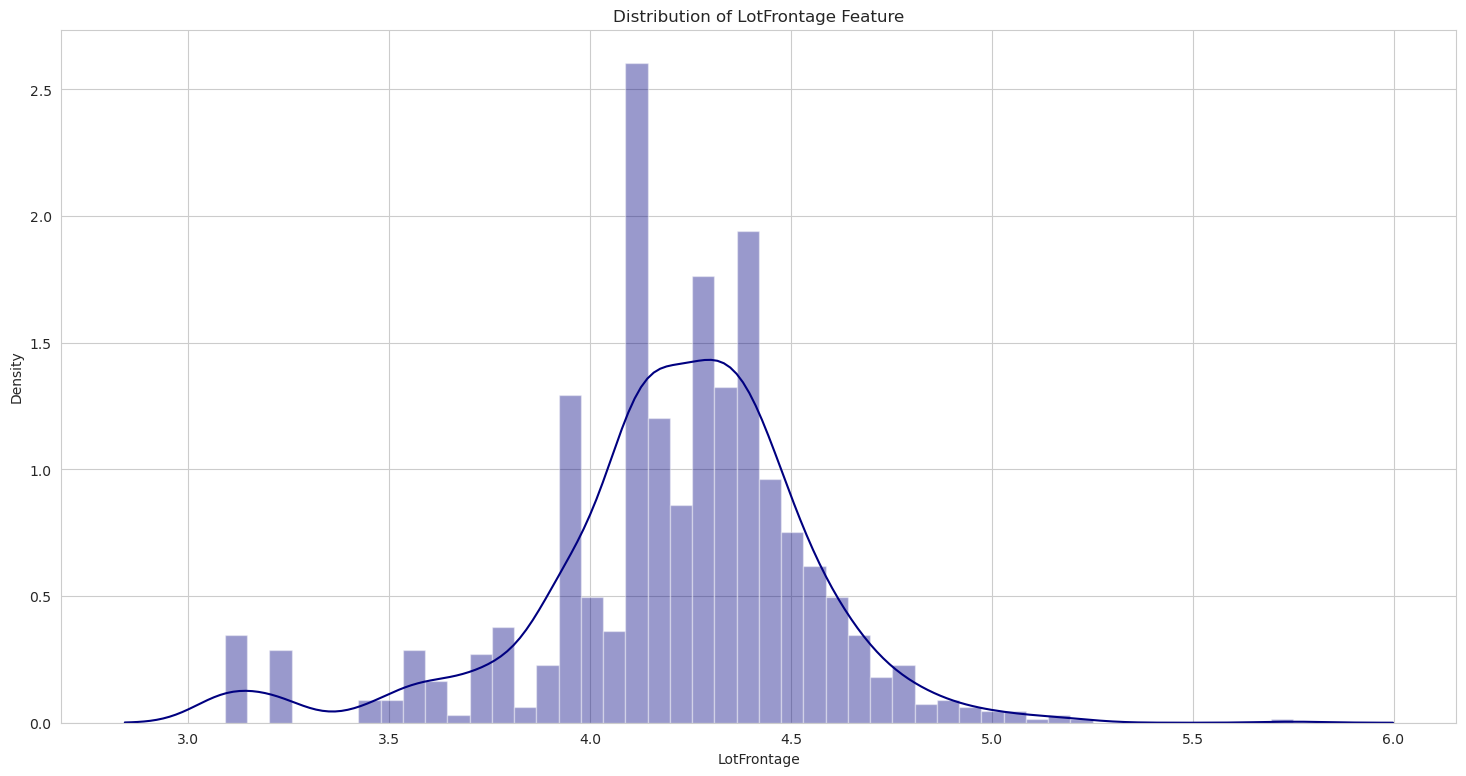

In [118]:
train['LotFrontage'] = np.log1p(train['LotFrontage'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['LotFrontage'], color="navy")
ax.set(xlabel="LotFrontage")
ax.set(title="Distribution of LotFrontage Feature")
plt.show()

#### **Now the distribution of the LotFrontage feature is much more fitted for Normal Distribution**

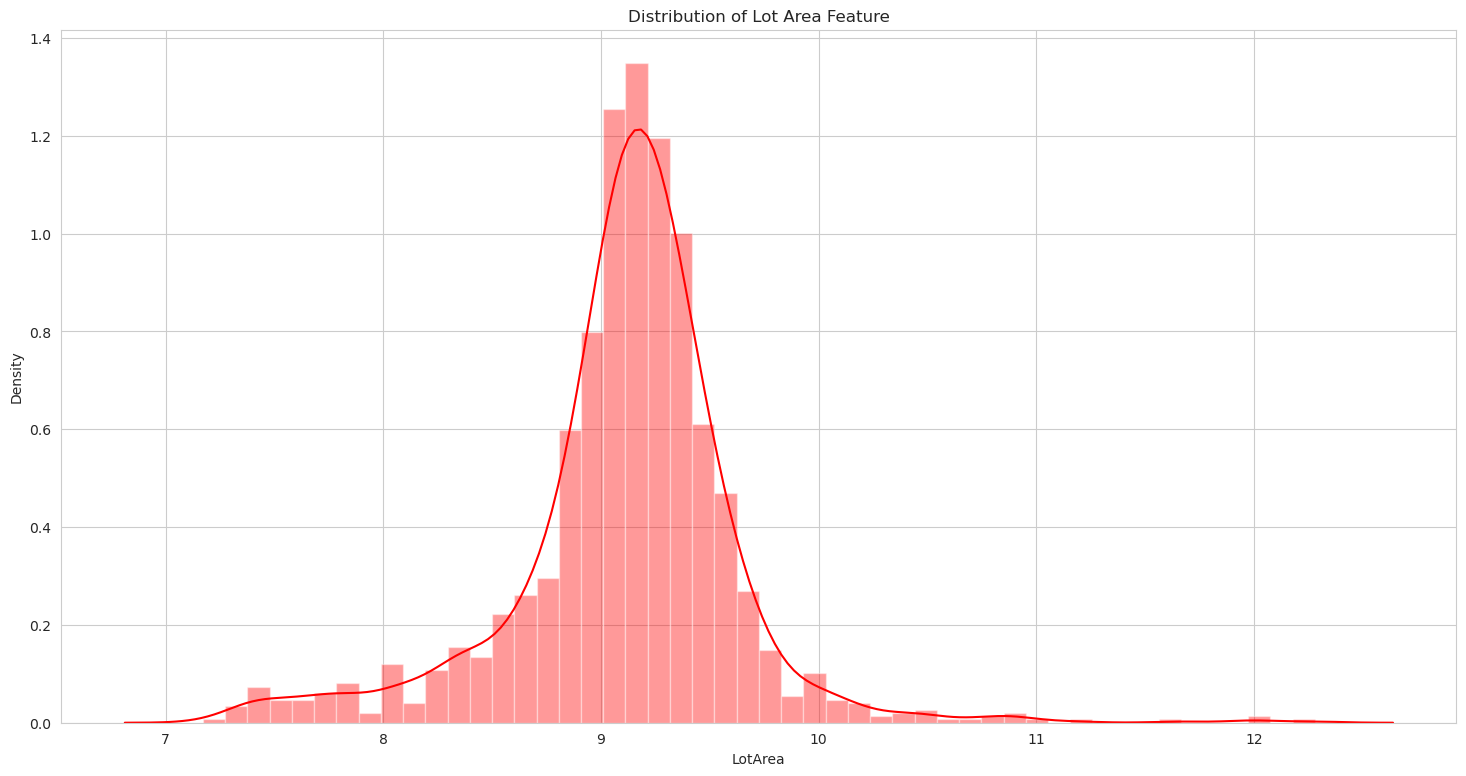

In [123]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['LotArea'], color="red")
ax.set(xlabel="LotArea")
ax.set(title="Distribution of Lot Area Feature")
plt.show()

#### **The distribution of the LotArea feature seems not like Normal Distribution. To convert the distribution of the LotArea Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

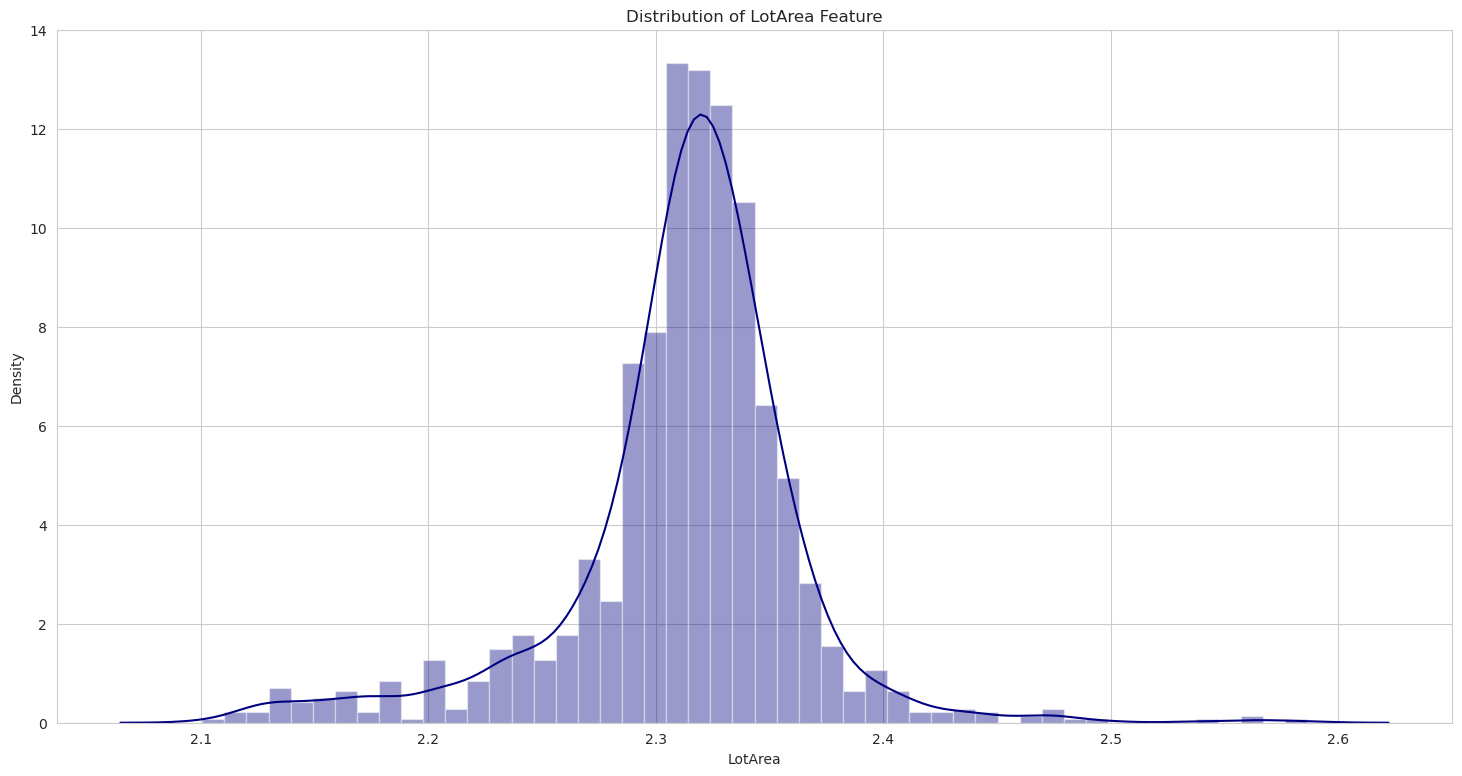

In [124]:
train['LotArea'] = np.log1p(train['LotArea'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['LotArea'], color="navy")
ax.set(xlabel="LotArea")
ax.set(title="Distribution of LotArea Feature")
plt.show()

#### **Now the distribution of the LotArea feature is much more fitted for Normal Distribution**

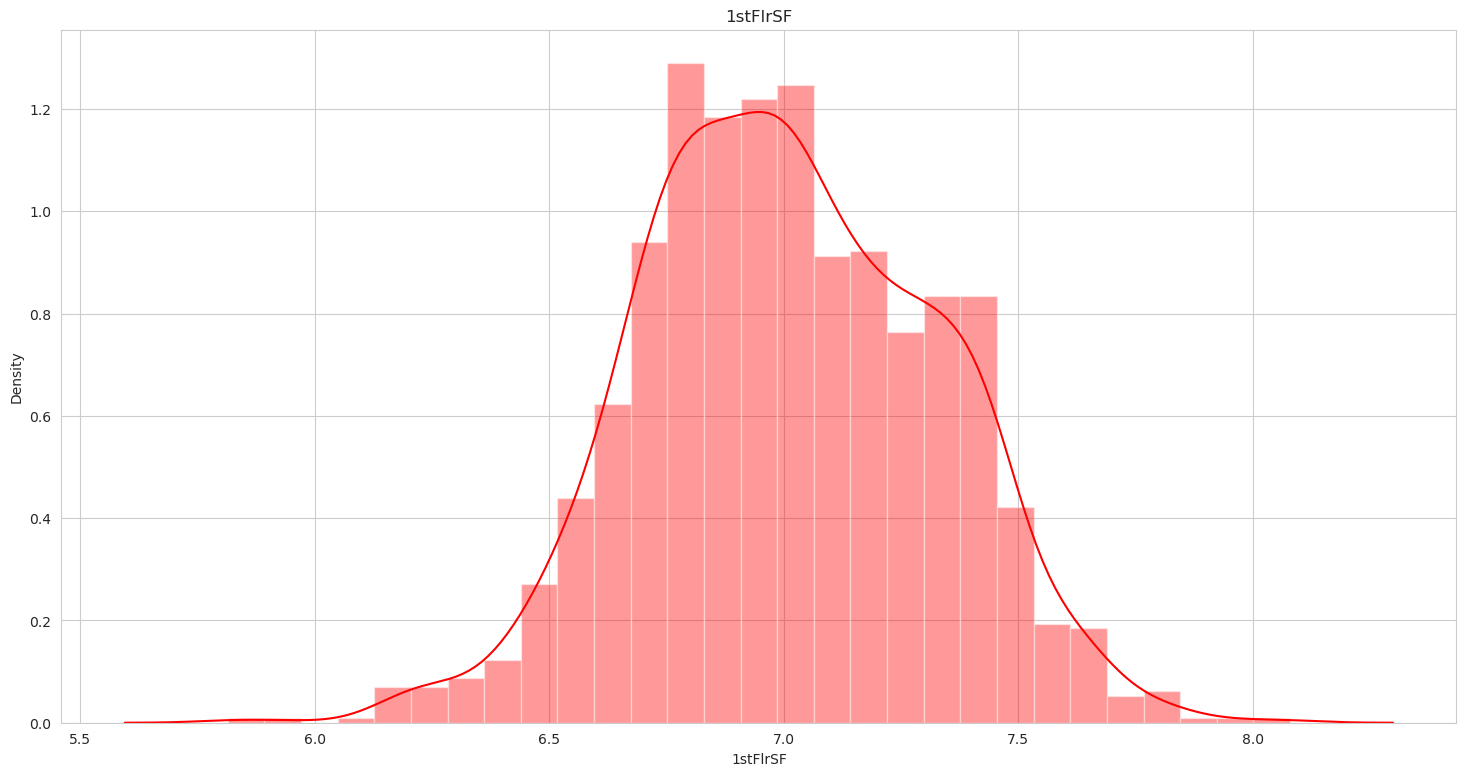

In [125]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['1stFlrSF'], color="red")
ax.set(xlabel="1stFlrSF")
ax.set(title="1stFlrSF")
plt.show()

#### **The distribution of the 1stFlrSF feature seems not like Normal Distribution. To convert the distribution of the 1stFlrSF Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

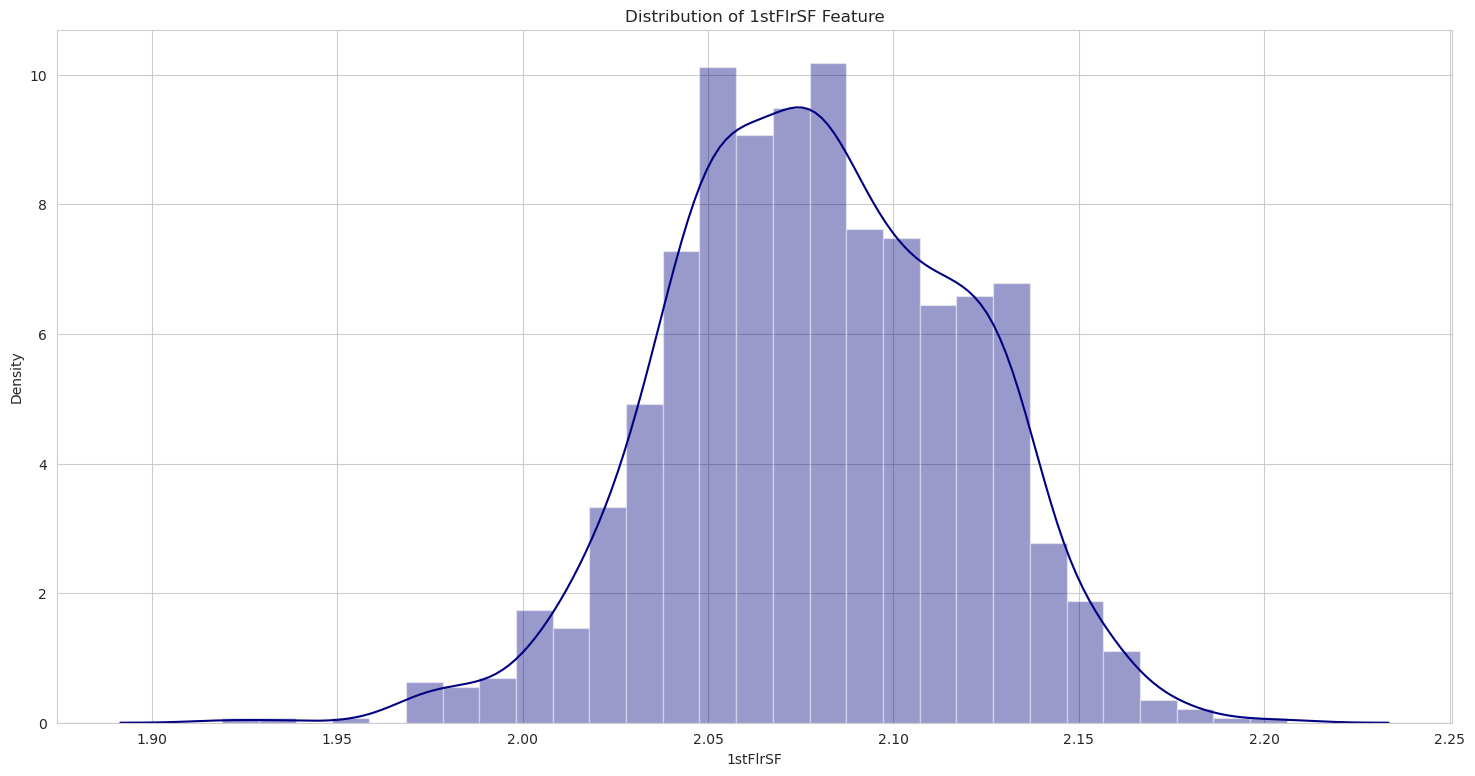

In [126]:
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['1stFlrSF'], color="navy")
ax.set(xlabel="1stFlrSF")
ax.set(title="Distribution of 1stFlrSF Feature")
plt.show()

#### **Now the distribution of the 1stFlrSF feature is much more fitted for Normal Distribution**

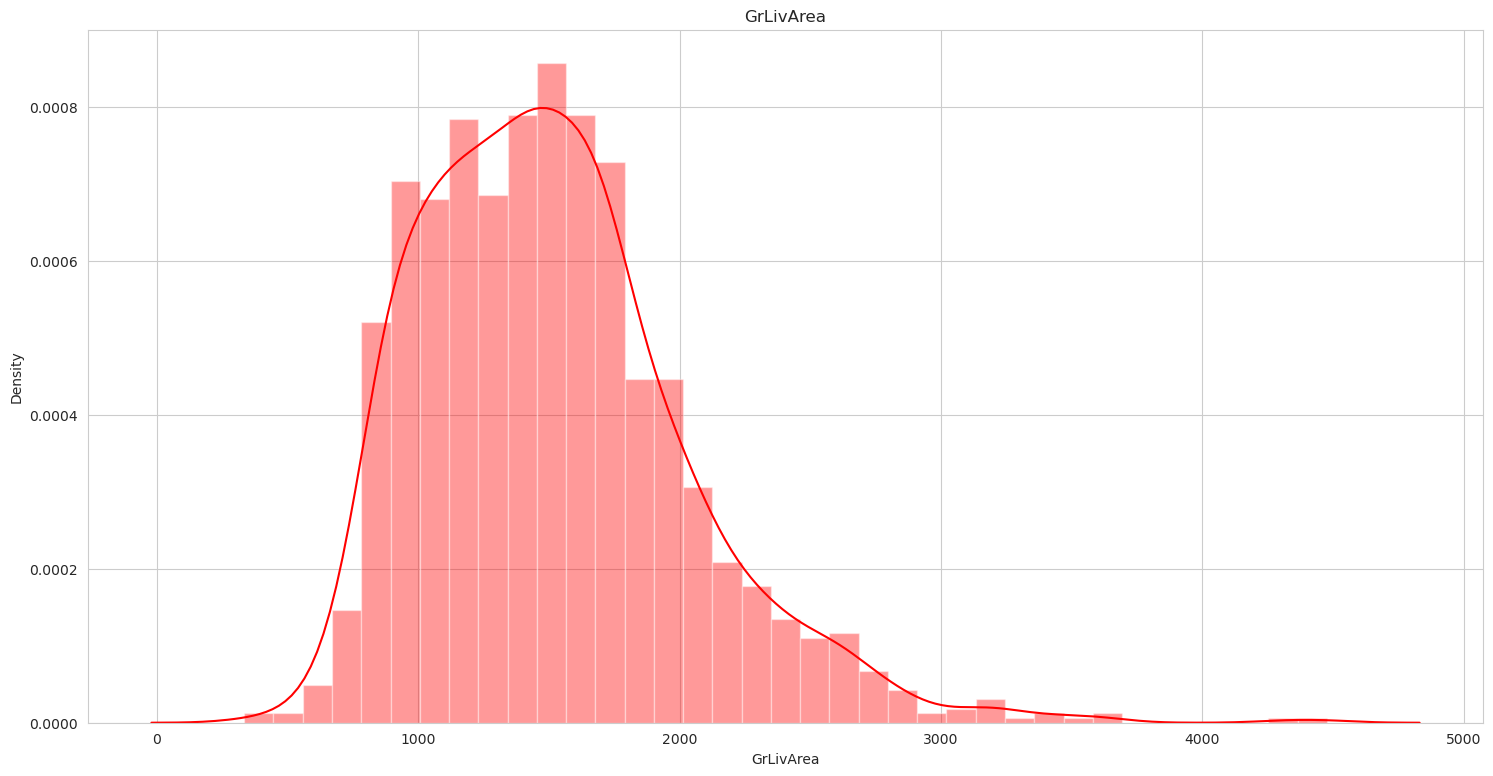

In [127]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['GrLivArea'], color="red")
ax.set(xlabel="GrLivArea")
ax.set(title="GrLivArea")
plt.show()

#### **The distribution of the GrLivArea feature seems not like Normal Distribution. To convert the distribution of the GrLivArea Feature to Normal Distribution, np.log1p transformation function in numpy was applied**

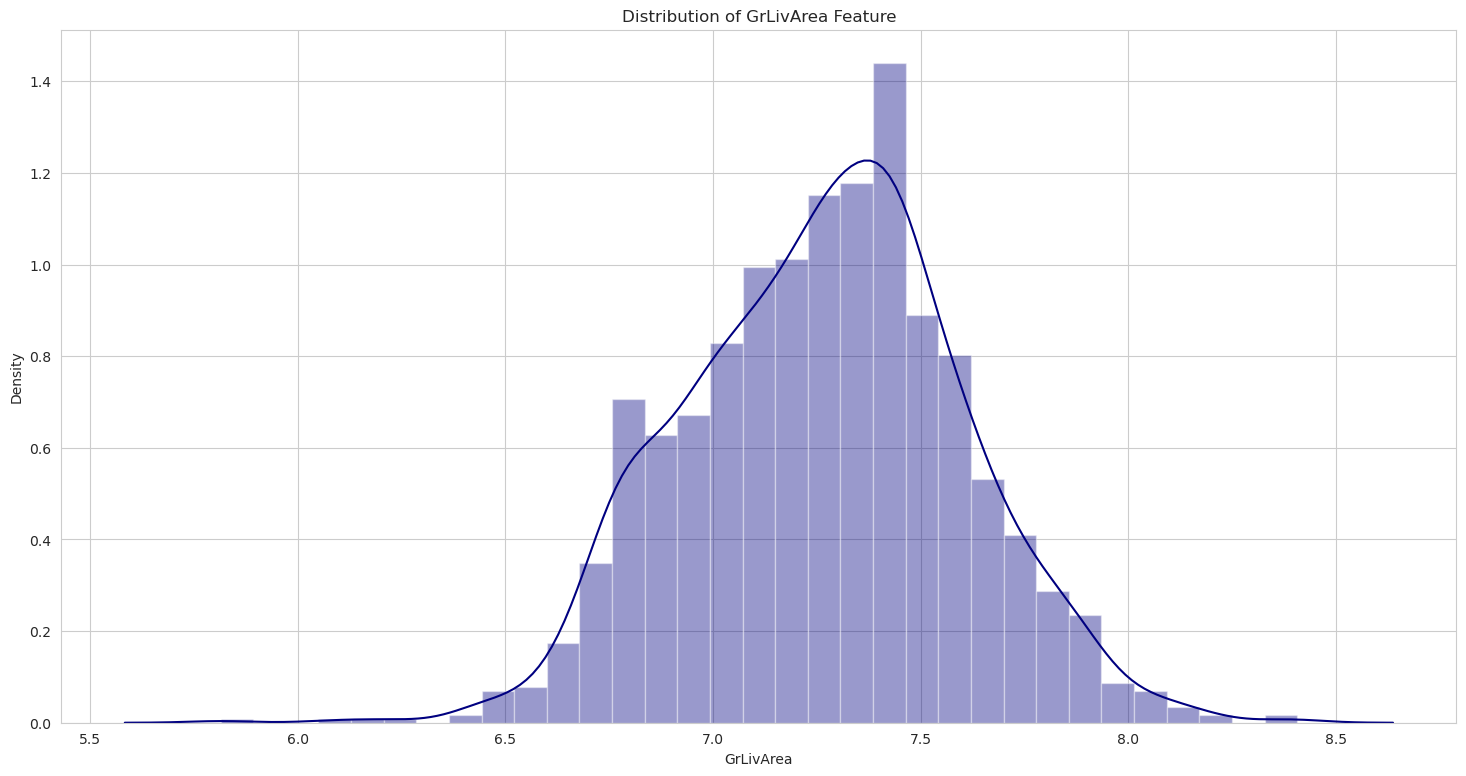

In [128]:
train['GrLivArea'] = np.log1p(train['GrLivArea'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['GrLivArea'], color="navy")
ax.set(xlabel="GrLivArea")
ax.set(title="Distribution of GrLivArea Feature")
plt.show()

#### **Now the distribution of the GrLivArea feature is much more fitted for Normal Distribution**

In [158]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_new = pd.concat((train, test)).reset_index(drop=True)
df_new.drop(['SalePrice'], axis=1, inplace=True)

## HANDLING MISSING VALUES

In [159]:
df_new.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

<AxesSubplot:>

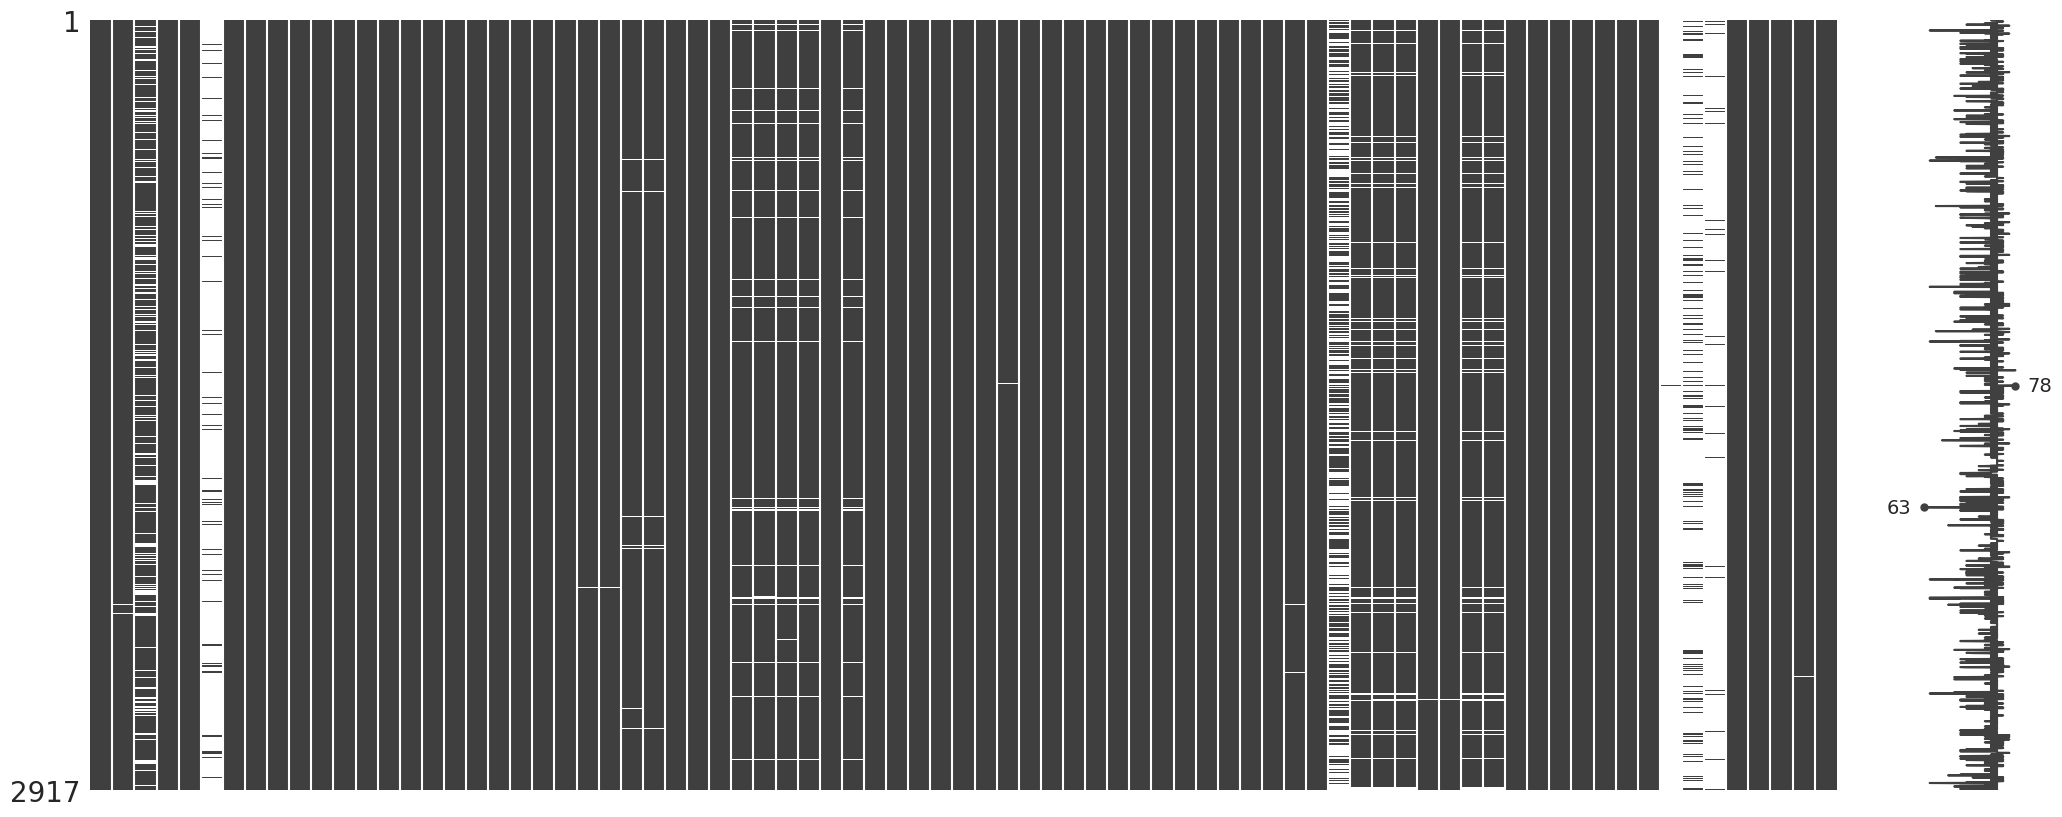

In [160]:
msno.matrix(df_new)

In [163]:
df_new["PoolQC"] = df_new["PoolQC"].fillna("Not Available")
df_new["MiscFeature"] = df_new["MiscFeature"].fillna("Not Available")
df_new["Alley"] = df_new["Alley"].fillna("Not Available")
df_new["FireplaceQu"] = df_new["FireplaceQu"].fillna("Not Available")
df_new["LotFrontage"] = df_new.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_new["MasVnrType"] = df_new["MasVnrType"].fillna("Not Available")
df_new["Fence"] = df_new["Fence"].fillna("Not Available")
df_new['SaleType'] = df_new['SaleType'].fillna(df_new['SaleType'].mode()[0])
df_new['MSSubClass'] = df_new['MSSubClass'].fillna("Not Available")
df_new = df_new.drop(['Utilities'], axis=1)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_new[col] = df_new[col].fillna('Not Available')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_new[col] = df_new[col].fillna('Not Available')

In [164]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_new[col] = df_new[col].fillna(0)

In [165]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_new[col] = df_new[col].fillna(0)

In [166]:
df_new["MasVnrArea"] = df_new["MasVnrArea"].fillna(0)

In [182]:
df_new["Functional"]

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
2912    Typ
2913    Typ
2914    Typ
2915    Typ
2916    Typ
Name: Functional, Length: 2917, dtype: object

In [180]:
df_new['MSZoning'] = df_new['MSZoning'].fillna(df_new['MSZoning'].mode()[0])
df_new["Functional"] = df_new["Functional"].fillna("Typ")
df_new['Electrical'] = df_new['Electrical'].fillna(df_new['Electrical'].mode()[0])
df_new['KitchenQual'] = df_new['KitchenQual'].fillna(df_new['KitchenQual'].mode()[0])
df_new['Exterior1st'] = df_new['Exterior1st'].fillna(df_new['Exterior1st'].mode()[0])
df_new['Exterior2nd'] = df_new['Exterior2nd'].fillna(df_new['Exterior2nd'].mode()[0])

Andn we have no more NaNs:

<AxesSubplot:>

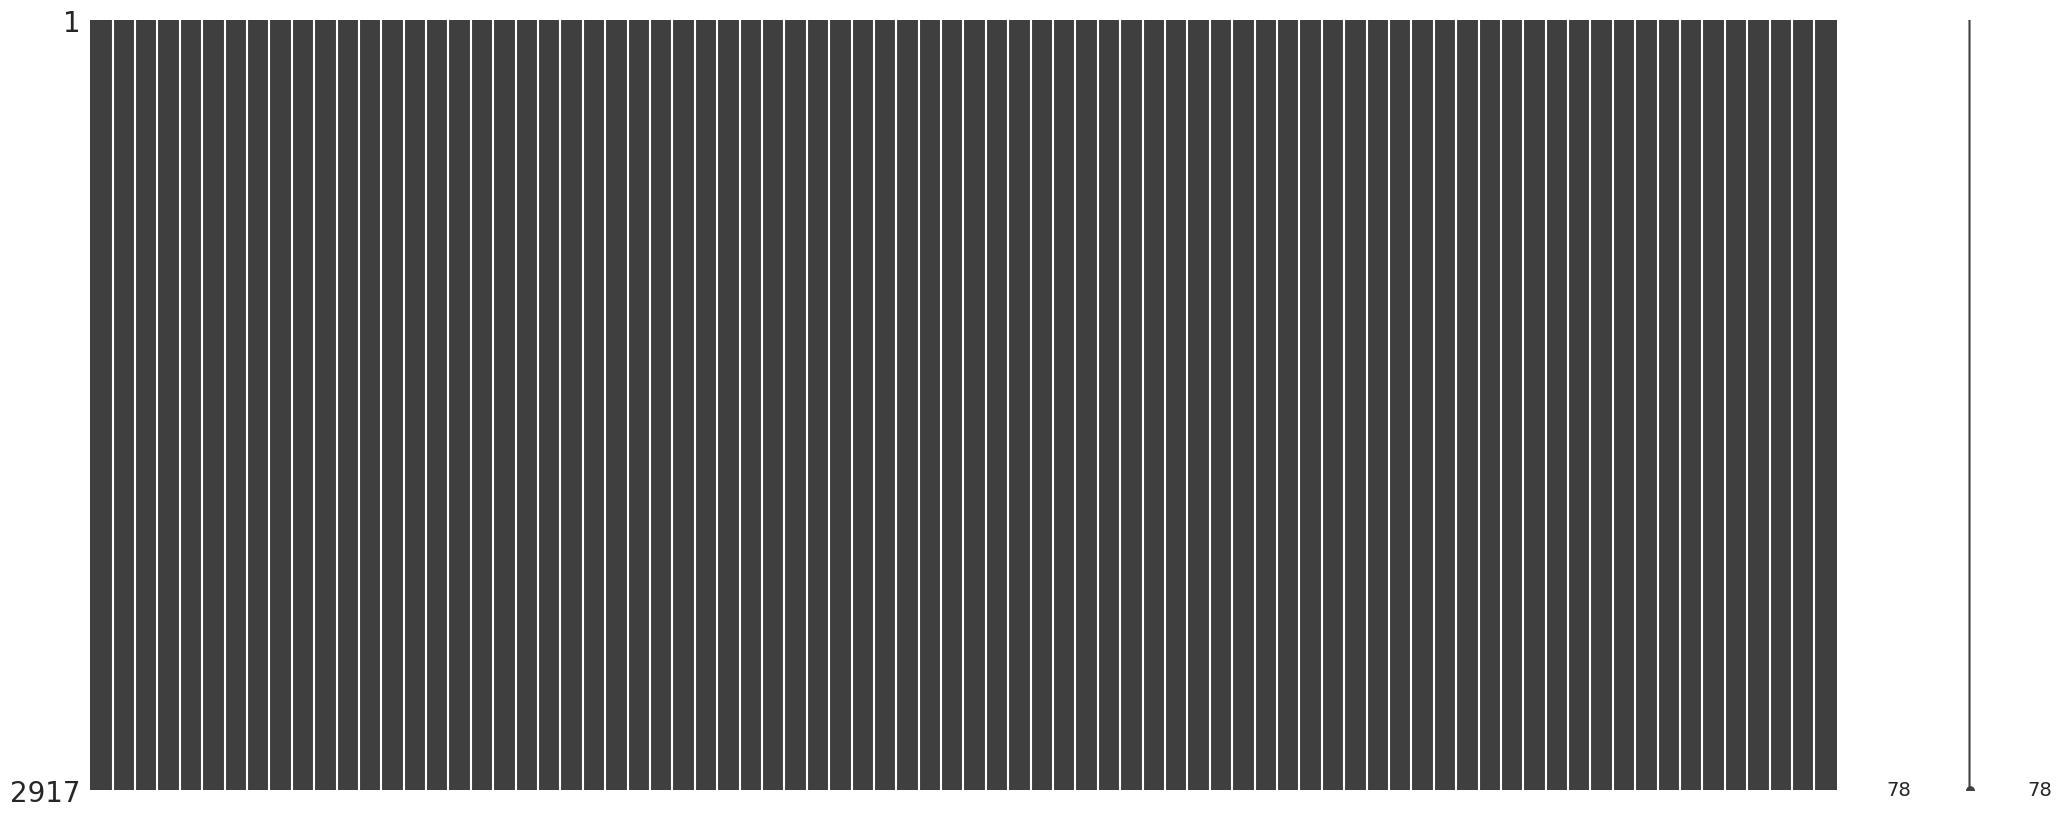

In [184]:
msno.matrix(df_new)

## FEATURE ENGINEERING

In [187]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   float64
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   object 
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

In [199]:
df_new['MSSubClass'] = df_new['MSSubClass'].apply(str)
df_new['OverallCond'] = df_new['OverallCond'].astype(str)
df_new['YrSold'] = df_new['YrSold'].astype(str)
df_new['MoSold'] = df_new['MoSold'].astype(str)

In [200]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

le = LabelEncoder()

for i in cols:
    df_new[i] = le.fit_transform(df_new[[i]])

In [193]:
df_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,4.190,2.307,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,2,4,PConc,2,4,3,2,706.000,6,0.000,150.000,856.000,GasA,0,1,SBrkr,2.048,854,0,7.445,1.000,0.000,2,1,3,1,2,8,6,0,3,Attchd,2003.000,2,2.000,548.000,5,5,2,0,61,0,0,0,0,3,4,Not Available,0,4,2,WD,Normal
1,5,RL,4.394,2.319,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,3,4,CBlock,2,4,1,0,978.000,6,0.000,284.000,1262.000,GasA,0,1,SBrkr,2.097,0,0,7.141,0.000,1.000,2,0,3,1,3,6,6,1,5,Attchd,1976.000,2,2.000,460.000,5,5,2,298,0,0,0,0,0,3,4,Not Available,0,7,1,WD,Normal
2,10,RL,4.234,2.335,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,2,4,PConc,2,4,2,2,486.000,6,0.000,434.000,920.000,GasA,0,1,SBrkr,2.057,866,0,7.488,1.000,0.000,2,1,3,1,2,6,6,1,5,Attchd,2001.000,2,2.000,608.000,5,5,2,0,42,0,0,0,0,3,4,Not Available,0,11,2,WD,Normal
3,11,RL,4.111,2.319,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,3,4,BrkTil,4,1,3,0,216.000,6,0.000,540.000,756.000,GasA,2,1,SBrkr,2.063,756,0,7.449,1.000,0.000,1,0,3,1,2,7,6,1,2,Detchd,1998.000,3,3.000,642.000,5,5,2,0,35,272,0,0,0,3,4,Not Available,0,4,0,WD,Abnorml
4,10,RL,4.443,2.358,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,2,4,PConc,2,4,0,2,655.000,6,0.000,490.000,1145.000,GasA,0,1,SBrkr,2.085,1053,0,7.696,1.000,0.000,2,1,4,1,2,9,6,1,5,Attchd,2000.000,2,3.000,836.000,5,5,2,192,84,0,0,0,0,3,4,Not Available,0,3,2,WD,Normal


In [293]:
skewed_feats

PoolArea         15.508
3SsnPorch         8.723
LowQualFinSF      8.383
MiscVal           5.049
LandSlope         4.278
BsmtHalfBath      3.721
ScreenPorch       2.917
BsmtFinSF2        2.367
EnclosedPorch     1.891
HalfBath          0.544
MasVnrArea        0.440
BsmtFullBath      0.363
2ndFlrSF          0.292
HeatingQC         0.113
WoodDeckSF        0.097
Fireplaces        0.021
GrLivArea         0.006
LotArea           0.004
1stFlrSF          0.003
LotFrontage      -0.034
KitchenAbvGr     -0.138
OpenPorchSF      -0.201
TotRmsAbvGrd     -0.336
YearRemodAdd     -0.458
YearBuilt        -0.629
LotShape         -0.687
BsmtFinSF1       -0.755
YrSold           -1.043
GarageFinish     -1.079
FullBath         -1.358
BsmtFinType1     -1.438
OverallQual      -1.578
BsmtExposure     -1.781
MSSubClass       -2.363
BsmtQual         -2.376
GarageCars       -2.590
MoSold           -2.665
BsmtUnfSF        -2.911
KitchenQual      -3.017
PavedDrive       -3.178
CentralAir       -3.458
BedroomAbvGr    

In [295]:
skewed_feats[(abs(skewed_feats) > 0.75)].index

Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'LandSlope',
       'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch',
       'BsmtFinSF1', 'YrSold', 'GarageFinish', 'FullBath', 'BsmtFinType1',
       'OverallQual', 'BsmtExposure', 'MSSubClass', 'BsmtQual', 'GarageCars',
       'MoSold', 'BsmtUnfSF', 'KitchenQual', 'PavedDrive', 'CentralAir',
       'BedroomAbvGr', 'Fence', 'GarageArea', 'GarageYrBlt', 'FireplaceQu',
       'BsmtCond', 'Alley', 'ExterQual', 'GarageQual', 'BsmtFinType2',
       'ExterCond', 'TotalBsmtSF', 'GarageCond', 'OverallCond', 'Functional',
       'Street', 'PoolQC'],
      dtype='object')

In [296]:
skewness

,Skew
PoolArea,15.508
3SsnPorch,8.723
LowQualFinSF,8.383
MiscVal,5.049
LandSlope,4.278
BsmtHalfBath,3.721
ScreenPorch,2.917
BsmtFinSF2,2.367
EnclosedPorch,1.891
HalfBath,NaN


In [298]:
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index

skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
# skewed_feats = skewed_feats[(abs(skewed_feats) > 0.75)]
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print(f"There are {skewness.shape[0]} skewed numerical features to Box Cox transform")

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df_new[i] = boxcox1p(df_new[i], lam)


Skew in numerical features: 

There are 58 skewed numerical features to Box Cox transform


In [302]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [303]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [305]:
df_new = pd.get_dummies(df_new)
print(df_new.shape)
train = df_new[:ntrain]
test = df_new[ntrain:]
print(train.shape)
print(test.shape)

(2917, 220)
(1458, 220)
(1459, 220)


## REGRESSION MODELS

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

In [ ]:
xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=8000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

In [ ]:
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
rfr = RandomForestRegressor(n_estimators=7000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123).get_n_splits(train.values)

In [ ]:
gbr_mse_cv_scores = - cross_val_score(gbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

In [ ]:
gbr.fit(train, y_train)
gbr_train_pred = gbr.predict(train)
gbr_pred = np.expm1(gbr.predict(test.values))
rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
print(rmse_gbr)

In [ ]:
xgbr.fit(train,y_train)
xgbr_train_pred = xgbr.predict(train)
xgbr_pred = np.expm1(xgbr.predict(test.values))
rmse_xgbr = np.sqrt(mean_squared_error(y_train,xgbr_train_pred))
print(rmse_xgbr)

In [ ]:
lgbm.fit(train, y_train)
lgbm_train_pred = lgbm.predict(train)
lgbm_pred = np.expm1(lgbm.predict(test.values))
rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
print(rmse_lgbm)

In [ ]:
rfr.fit(train, y_train)
rfr_train_pred = rfr.predict(train)
rfr_pred = np.expm1(rfr.predict(test.values))
rmse_rfr = np.sqrt(mean_squared_error(y_train,rfr_train_pred))
print(rmse_rfr)

In [ ]:
models = ['Gradient Boosting', 'XGBoost', 'LightGBM', 'Random Forest']

rmse_scores = [rmse_gbr, rmse_xgbr, rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

In [ ]:
sns.catplot(x = 'Regression Models', y = 'RMSE Scores', order = ['LightGBM', 'Gradient Boosting', 'Random Forest', 'XGBoost'],
           data = results, kind='point', color = 'Navy')
plt.title('RMSE Scores of Advanced Regression Models')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
results.to_csv('final_submission.csv', index = 'None')

## CONCLUSION

**Based on the modelling with advanced regression algorithms, LightGBM seems to have the minimum RMSE score which makes it the best for predictions in this dataset.**